Prepocessing dataset

Door : Cuppen Brian en Driessens Lucas

In [1]:
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML libraries inladen
# Voor statistische data visualisatie
import seaborn as sns; sns.set(color_codes=True)

In [10]:
dataset = pd.read_csv('anime.csv')
dataset.shape

(24000, 31)

In [3]:
dataset.head(2)

,Unnamed: 0,Rank,Title,Link,Score,Type,# Episodes,Source,Status,Premiered,...,Adaptation,Sequel,Prequel,Characters,Role,Voice Actors,Openings,Opening Artists,Endings,Ending Artists
0,0,1.0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.11,TV,64,Manga,Finished Airing,Spring 2009,...,Fullmetal Alchemist,NaN,NaN,"['Elric, Edward', 'Elric, Alphonse', 'Mustang,...","['Main', 'Main', 'Supporting', 'Supporting', '...","['Park, Romi', 'Kugimiya, Rie', 'Miki, Shinich...","['again', 'Hologram (ホログラム)', 'Golden Time Lov...","['YUI', 'NICO Touches the Walls', 'Sukima Swit...","['Uso (嘘)', 'LET IT OUT', 'Tsunaida Te (つないだ手)...","['SID', 'Miho Fukuhara', ""Lil'B"", 'SCANDAL', '..."
1,1,2.0,Bleach: Sennen Kessen-hen,https://myanimelist.net/anime/41467/Bleach__Se...,9.10,TV,13,Manga,Finished Airing,Fall 2022,...,Bleach,Bleach: Sennen Kessen-hen - Ketsubetsu-tan,Bleach,"['Kurosaki, Ichigo', 'Kuchiki, Rukia', 'Inoue,...","['Main', 'Main', 'Main', 'Main', 'Main', 'Main...","['Morita, Masakazu', 'Orikasa, Fumiko', 'Matsu...",['スカー'],['キタニタツヤ'],"['Rapport', '最果て', 'Number One']","['キタニタツヤ', 'SennaRin', 'Shiro Sagisu, Hazel Fe..."


In [4]:
#check if there are any null values
if dataset.isnull().values.any():
    print("There are null values, beaware")
else:
    print("There are no null values")

dataset.head(2)

There are null values, beaware


,Unnamed: 0,Rank,Title,Link,Score,Type,# Episodes,Source,Status,Premiered,...,Adaptation,Sequel,Prequel,Characters,Role,Voice Actors,Openings,Opening Artists,Endings,Ending Artists
0,0,1.0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.11,TV,64,Manga,Finished Airing,Spring 2009,...,Fullmetal Alchemist,NaN,NaN,"['Elric, Edward', 'Elric, Alphonse', 'Mustang,...","['Main', 'Main', 'Supporting', 'Supporting', '...","['Park, Romi', 'Kugimiya, Rie', 'Miki, Shinich...","['again', 'Hologram (ホログラム)', 'Golden Time Lov...","['YUI', 'NICO Touches the Walls', 'Sukima Swit...","['Uso (嘘)', 'LET IT OUT', 'Tsunaida Te (つないだ手)...","['SID', 'Miho Fukuhara', ""Lil'B"", 'SCANDAL', '..."
1,1,2.0,Bleach: Sennen Kessen-hen,https://myanimelist.net/anime/41467/Bleach__Se...,9.10,TV,13,Manga,Finished Airing,Fall 2022,...,Bleach,Bleach: Sennen Kessen-hen - Ketsubetsu-tan,Bleach,"['Kurosaki, Ichigo', 'Kuchiki, Rukia', 'Inoue,...","['Main', 'Main', 'Main', 'Main', 'Main', 'Main...","['Morita, Masakazu', 'Orikasa, Fumiko', 'Matsu...",['スカー'],['キタニタツヤ'],"['Rapport', '最果て', 'Number One']","['キタニタツヤ', 'SennaRin', 'Shiro Sagisu, Hazel Fe..."


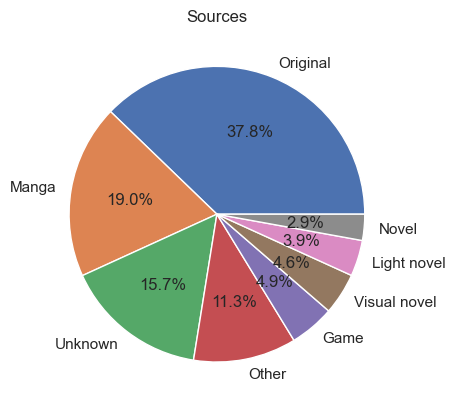

In [12]:
# pie chart van sources
plt.title('Sources')
# set data with less than 5% to other
dataset['Source'] = np.where(dataset['Source'].isin(dataset['Source'].value_counts().index[dataset['Source'].value_counts(normalize=True) < 0.02]), 'Other', dataset['Source'])
plt.pie(dataset['Source'].value_counts(), labels=dataset['Source'].value_counts().index, autopct='%1.1f%%')
plt.show()

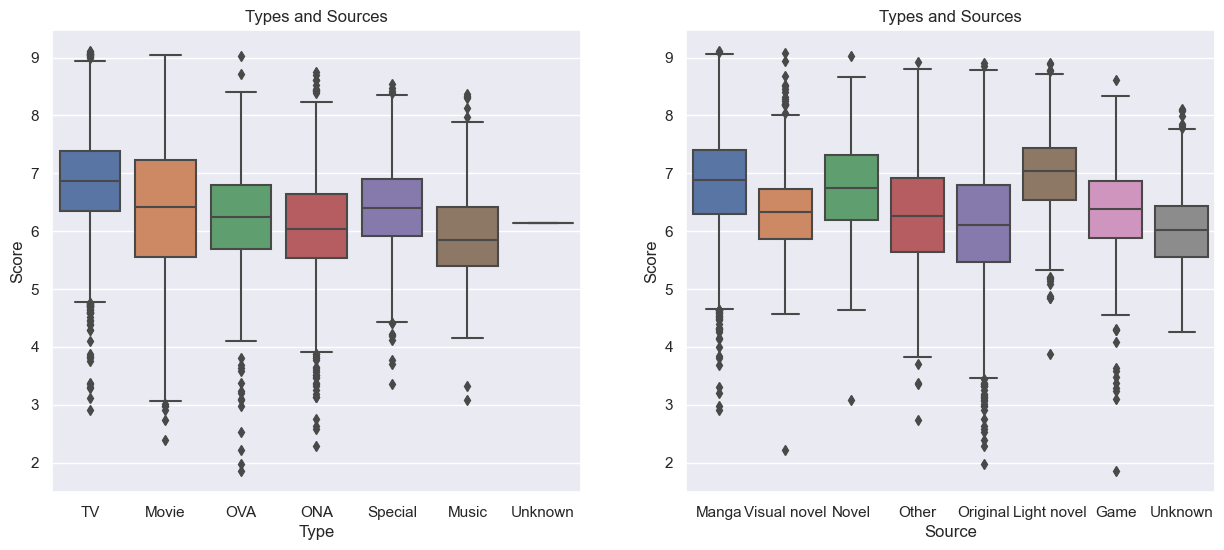

In [18]:
# boxplot voor types en sources
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Type', y='Score', data=dataset)
plt.title('Types and Sources')
plt.subplot(1, 2, 2)
sns.boxplot(x='Source', y='Score', data=dataset)
plt.title('Types and Sources')
plt.show()

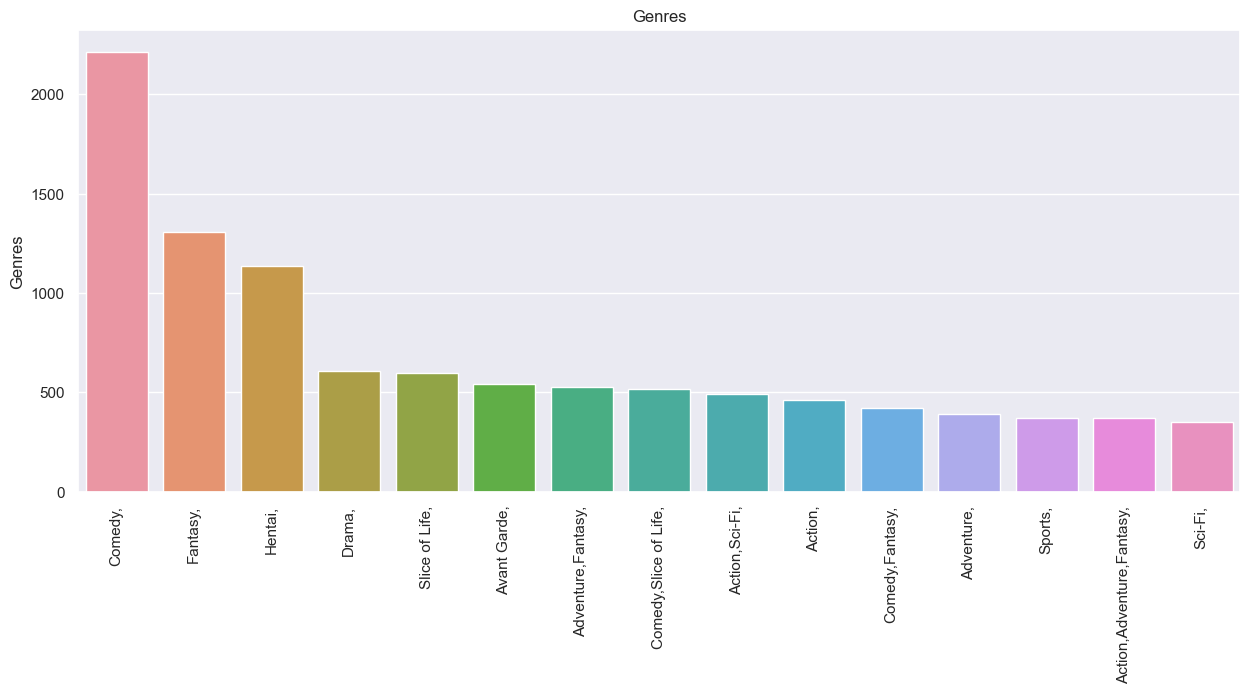

In [26]:
#bar chart van de genres   
plt.figure(figsize=(15, 6))
plt.title('Genres')
sns.barplot(x=dataset['Genres'].value_counts().index[:15], y=dataset['Genres'].value_counts()[:15])
plt.xticks(rotation=90)
plt.show()

/Users/lucasdriessens/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


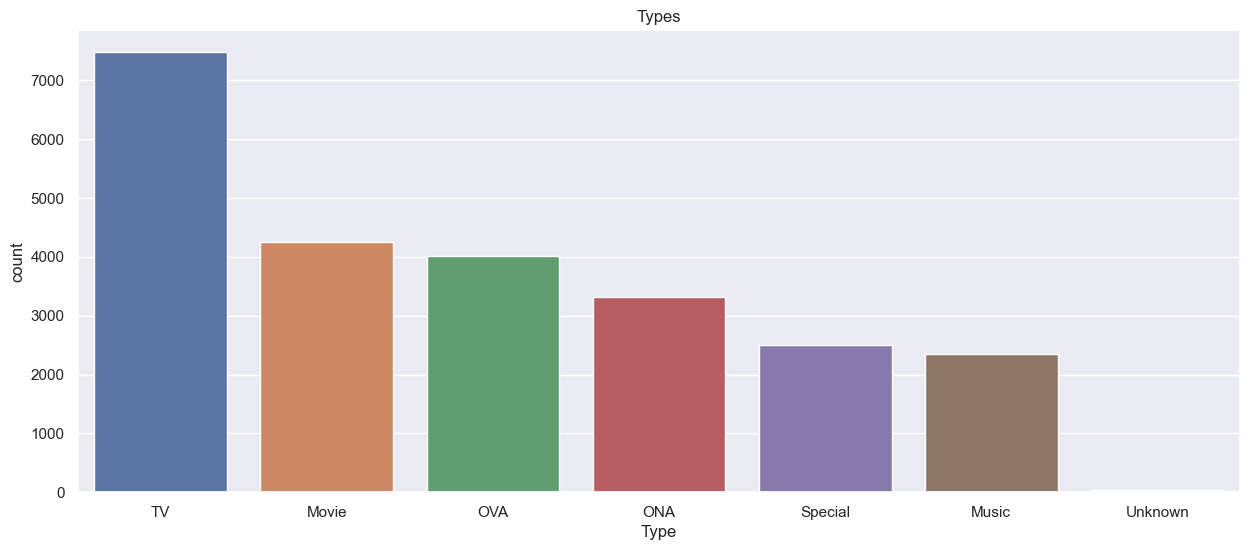

In [27]:
# countplot van de types
plt.figure(figsize=(15, 6))
plt.title('Types')
sns.countplot(dataset['Type'])
plt.show()


In [5]:
#deleting Ending Artists, Endings,Opening Artists,Openings,Voice Actors,Unnamed: 0,Role,Characters,Sequel,Prequel
dataset = dataset.drop(['Ending Artists','Endings','Opening Artists','Openings','Voice Actors','Unnamed: 0','Role','Characters','Sequel','Prequel'], axis=1)
dataset.head(2)

,Rank,Title,Link,Score,Type,# Episodes,Source,Status,Premiered,Aired Date,...,Genres,Themes,Demographic,Duration,Age Rating,Number of Raters,Popularity,Members,Favorites,Adaptation
0,1.0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.11,TV,64,Manga,Finished Airing,Spring 2009,"Apr 5, 2009 to Jul 4, 2010",...,"Action,Adventure,Drama,Fantasy,","Military,",Shounen,24 min. per ep.,R - 17+ (violence & profanity),1964982.0,#3,"3,090,885","213,428",Fullmetal Alchemist
1,2.0,Bleach: Sennen Kessen-hen,https://myanimelist.net/anime/41467/Bleach__Se...,9.10,TV,13,Manga,Finished Airing,Fall 2022,"Oct 11, 2022 to Dec 27, 2022",...,"Action,Adventure,Fantasy,",NaN,Shounen,24 min. per ep.,R - 17+ (violence & profanity),171970.0,#525,"389,971","15,793",Bleach


In [6]:
#Query 1 : top anime list [rank,ranking]
#Ranking = Title + 'score:' + Score
dataset['Ranking'] = dataset['Title'] + ' score: ' + dataset['Score'].astype(str)
#check if there are no missing titles and ranking
if dataset['Title'].isnull().values.any() | dataset['Ranking'].isnull().values.any():
    print("There are null values")
else:
    print("There are no null values")
#export colums into a json file
dataset[['Rank','Ranking']].head(25).to_json('top_anime_list.json',orient='records')
print("jsons exported")


There are no null values
jsons exported


In [7]:
dataset.head(2)

,Rank,Title,Link,Score,Type,# Episodes,Source,Status,Premiered,Aired Date,...,Themes,Demographic,Duration,Age Rating,Number of Raters,Popularity,Members,Favorites,Adaptation,Ranking
0,1.0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.11,TV,64,Manga,Finished Airing,Spring 2009,"Apr 5, 2009 to Jul 4, 2010",...,"Military,",Shounen,24 min. per ep.,R - 17+ (violence & profanity),1964982.0,#3,"3,090,885","213,428",Fullmetal Alchemist,Fullmetal Alchemist: Brotherhood score: 9.11
1,2.0,Bleach: Sennen Kessen-hen,https://myanimelist.net/anime/41467/Bleach__Se...,9.10,TV,13,Manga,Finished Airing,Fall 2022,"Oct 11, 2022 to Dec 27, 2022",...,NaN,Shounen,24 min. per ep.,R - 17+ (violence & profanity),171970.0,#525,"389,971","15,793",Bleach,Bleach: Sennen Kessen-hen score: 9.1


In [8]:
#show all colums
dataset.columns

Index(['Rank', 'Title', 'Link', 'Score', 'Type', '# Episodes', 'Source',
       'Status', 'Premiered', 'Aired Date', 'Studios', 'Genres', 'Themes',
       'Demographic', 'Duration', 'Age Rating', 'Number of Raters',
       'Popularity', 'Members', 'Favorites', 'Adaptation', 'Ranking'],
      dtype='object')

In [9]:
#show all Age Ratings
print("All Age Ratings:")
print(dataset["Age Rating"].unique())

All Age Ratings:
['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'R+ - Mild Nudity' 'PG - Children' 'G - All Ages' nan 'None'
 'Rx - Hentai']


In [10]:
#Query 2 : anime recommendation based age-rating
#Query options are : G - All Ages -> all_ages, PG - Children -> children, PG-13 - Teens 13 or older -> teens, R - 17+ (violence & profanity) -> violence, R+ - Mild Nudity -> R+, Rx - Hentai -> hentai
#change G - All Ages -> all_ages, PG - Children -> children, PG-13 - Teens 13 or older -> teens, R - 17+ (violence & profanity) -> violence, R+ - Mild Nudity -> R+, Rx - Hentai -> hentai
dataset['Age Rating'] = dataset['Age Rating'].replace(['G - All Ages','PG - Children','PG-13 - Teens 13 or older','R - 17+ (violence & profanity)','R+ - Mild Nudity','Rx - Hentai'],['all_ages','children','teens','violence','R+','hentai'])
#check if there are no missing Age Ratings
if dataset['Age Rating'].isnull().values.any():
    print("There are null values")
    #delete null values
    dataset = dataset[dataset['Age Rating'].notnull()]
else:
    print("There are no null values")
# #drop hentai 
# dataset = dataset[dataset['Age Rating'] != 'hentai']
#count Age rating
dataset['Age Rating'].value_counts()

There are null values


teens       8094
all_ages    7426
children    4029
hentai      1417
violence    1365
R+          1094
None         551
Name: Age Rating, dtype: int64

In [11]:
#export colums into a json file for each age rating
for age_rating in dataset['Age Rating'].unique():
    dataset[['Title','Age Rating']][dataset['Age Rating'] == age_rating].head(20).to_json('Age_rating_list'+age_rating+'.json',orient='records')
print("jsons exported")

jsons exported


In [12]:

print(dataset["Genres"].unique())
#check for null values
if dataset['Genres'].isnull().values.any():
    print("There are Genres null values")
else:
    print("There are no Genres null values")

#print(dataset["Status"].unique())
#check for null values
if dataset['Status'].isnull().values.any():
    print("There are Status null values")
else:
    print("There are no Status null values")


['Action,Adventure,Drama,Fantasy,' 'Action,Adventure,Fantasy,'
 'Drama,Sci-Fi,Suspense,' 'Action,Comedy,Sci-Fi,' 'Comedy,Romance,'
 'Action,Drama,' 'Action,Comedy,Drama,Sci-Fi,' 'Drama,Sci-Fi,'
 'Drama,Romance,Supernatural,' 'Comedy,Drama,Romance,'
 'Drama,Slice of Life,' 'Award Winning,Drama,' 'Comedy,'
 'Action,Award Winning,Drama,Sci-Fi,' 'Award Winning,Drama,Fantasy,'
 'Comedy,Mystery,Supernatural,' 'Drama,Mystery,Suspense,'
 'Award Winning,Drama,Supernatural,' 'Action,Fantasy,' 'Action,'
 'Action,Comedy,Supernatural,' 'Action,Mystery,Supernatural,'
 'Adventure,Award Winning,Supernatural,' 'Sports,'
 'Comedy,Mystery,Romance,Supernatural,' 'Action,Adventure,Drama,'
 'Drama,Supernatural,' 'Action,Award Winning,Sci-Fi,'
 'Adventure,Fantasy,Mystery,Slice of Life,Supernatural,' 'Drama,'
 'Drama,Fantasy,Ecchi,' 'Action,Drama,Romance,' 'Action,Drama,Sci-Fi,'
 'Drama,Sports,' 'Action,Adventure,Supernatural,' 'Award Winning,Mystery,'
 'Action,Fantasy,Supernatural,' 'Comedy,Drama,'
 'Adventu

In [13]:
#Query 3:all anime with parameters [Status + Genres]

#preporcessing
#delete Genres and Status null values
dataset = dataset[dataset['Genres'].notnull()]
dataset = dataset[dataset['Status'].notnull()]

#print all status
print("All Status:")
print(dataset["Status"].unique())

#preporcessing
status = ['Finished Airing','Currently Airing','Not yet aired']
Genres = ['Action','Comedy','Romance','Fantasy','Adventure']

#part 1 : data with status = Finished Airing
finished_airing = dataset[dataset['Status'] == status[0]]
#export all finished airing anime with genres
for genre in Genres:
    finished_airing[['Title','Genres']][finished_airing['Genres'].str.contains(genre)].head(20).to_json('finished_airing_'+genre+'.json',orient='records')
print("finished_airing exported")

#part 2 : data with status = Currently Airing
currently_airing = dataset[dataset['Status'] == status[1]]
#export all currently airing anime with genres
for genre in Genres:
    currently_airing[['Title','Genres']][currently_airing['Genres'].str.contains(genre)].head(20).to_json('currently_airing_'+genre+'.json',orient='records')
print("currently_airing exported")


#part 3 : data with status = Not yet aired
not_yet_aired = dataset[dataset['Status'] == status[2]]
#export all not yet aired anime with genres
for genre in Genres:
    not_yet_aired[['Title','Genres']][not_yet_aired['Genres'].str.contains(genre)].head(20).to_json('not_yet_aired_'+genre+'.json',orient='records')
print("not_yet_aired exported")

All Status:
['Finished Airing' 'Currently Airing' 'Not yet aired']
finished_airing exported
currently_airing exported
not_yet_aired exported


In [17]:
#print all sources
print("All Sources:")
print(dataset["Source"].unique())
# #print all Genres
# print("All Genres:")
# print(dataset["Genres"].unique())

All Sources:
['Manga' 'Visual novel' 'Novel' '4-koma manga' 'Original' 'Light novel'
 'Web manga' 'Web novel' 'Game' 'Music' 'Book' 'Other' 'Unknown'
 'Picture book' 'Mixed media' 'Card game' 'Radio']


In [15]:
#Query 4:grafish visualisation of genres and sources
dataset.head(2)

#export json with Genres and Sources
dataset[['Genres','Source']].to_json('Genres_Sources.json',orient='records')
print("jsons exported")

jsons exported


In [16]:

print('All done!')

All done!
